# Problem 1:

## $$ y''(x, t) = -g $$

### a) deriving the analytical solution of the IVP

When deriving the analytical solution of the IVP, I assume g to be constant in both x and t. 

Integrating both sides with respect to time yields:
$$ \int y'' dt = \int -g dt $$

$$ \int y' dt = \int (-g t + C _1) dt $$

$$ y = -\frac{1}{2}g t^2 + C _1 t + C _2  $$

Our initial conditions: 
$$ y(0,0) = 0 $$

$$ y'(0,0) = v _{0,y} $$

These conditions state that:
$$ C _1 = v _{0,y} $$

$$ C _2 = 0 $$

Which yields the following solution to the IVP:
$$ y = -\frac{1}{2}g t^2 + v _{0,y} * t  $$

When decomposing the v0 vector, we can rephrase it in x and y: 

$$ v _{0,x} = v _0 * \cos(\theta) $$

$$ v _{0,y} = v _0 * \sin(\theta) $$

Where $\theta$ is the starting angle of the throw.

### b) stating the length of the throw

We now know the velocity in x-direction, and we can easily state the length of our throw:

$$ L = v _0 * \cos(\theta) * t $$


### c) minimization problem of the length

We want to **maximize** the length of our throw. Which is equivalent to minimizing 
$$ (-1) * L $$

We bound $t$ and $\theta$ in the following way:
$$ 0 < t < \infty $$

$$ 0 \leq \theta \leq \frac{\pi}{2}$$

And for our problem to work in a logical way, we don't want the ball to go under the ground.
Therefore, we constrain y to 0: 
$$ y = 0 $$

The maximized length of the throw is: 40.775 m
and the angle of the throw is 45.0*.


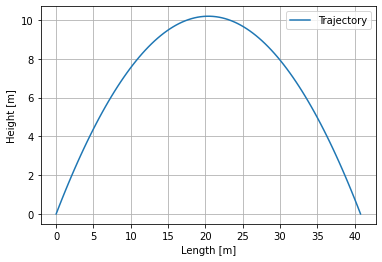

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

v0 = 20 # [m/s]
g = 9.81 # [m/s^2]


def y(liste):
    t = liste[0]
    theta = liste[1]
    
    return (-1/2)*9.81*t**2 + np.sin(theta)*v0*t

def lengde(liste):
    t = liste[0]
    theta = liste[1]
    vx = v0 * np.cos(theta)
    
    length = vx*t
    return -length

def Problem1():
    #Bounding time and theta
    bnds = [(0,None),(0,np.pi/2)]
    
    #Constraining y to 0, so that the ball is above the ground
    cnstr = {"type": "eq", "fun": y}
    
    #Using minimize to optimize length*(-1) (aka maximize)
    res = optimize.minimize(lengde,[3,np.pi/4],method="SLSQP",bounds=bnds, constraints=cnstr)
    print(f"The maximized length of the throw is: {round(lengde(res.x)*(-1),3)} m\nand the angle of the throw is {round(res.x[1]*180/np.pi,2)}*.")

    #Using optimized theta to plot the trajectory at different times
    optVec = res.x
    time = np.linspace(0,optVec[0],100)
    x = lengde([time,optVec[1]])*(-1)
    y_plot = y([time,optVec[1]])

    #Plotting the ball trajectory
    plt.plot(x,y_plot, label="Trajectory")
    plt.xlabel("Length [m]")
    plt.ylabel("Height [m]")
    plt.grid()
    plt.legend()
    plt.show()

Problem1()

# Problem 2

### Euler's method

$$ y _{n+1} = y _n + h*f(x _n, y _n)$$ 

Which in this case are vectors with two elements

$$ \left( \begin{array}{c} y \\ y' \end{array}\right)' = \left( \begin{array}{c} y' \\ -g \end{array}\right)  $$

Where the right side of this equation corresponds to **f** in Euler's method.

And we know that $ y _0 = 0 $ and $ y' _0 = v _{0,y} $, which will be the starting values. 





The maximized length of the throw is: 41.191 m
and the angle of the throw is 45.0*.


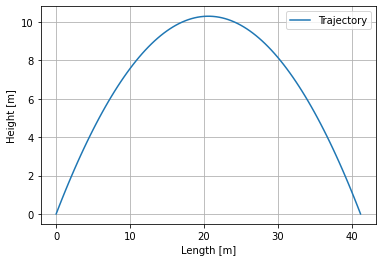

In [2]:
#Problem2

#Defining euler functions and numerical y and x
def eulerY(T,theta):
    y = [0]
    v0y = [v0*np.sin(theta)]
    
    dt = T[1]-T[0]
    
    for j in range(len(T)-1):
        y.append(y[-1] + dt*v0y[-1])
        v0y.append(v0y[-1] - dt*g)
    return y, v0y

def y_num(liste):
    T = np.linspace(0,liste[0],100)
    theta = liste[1]
    y, v0y = eulerY(T,theta)
    return y[-1]

def eulerX(T,theta):
    x = [0]
    v0x = v0*np.cos(theta)
    dt = T[1]-T[0]
    
    for j in range(len(T)-1):
        x.append(x[-1] - dt*v0x)
    
    return x

def x_num(liste):
    T = np.linspace(0,liste[0],100)
    theta = liste[1]
    x = eulerX(T,theta)
    return x[-1]

def Problem2():
    #bounding and constraining as earlier
    bnds = [(0,None),(0,np.pi/2)]
    cnstr = {"type": "eq", "fun": y_num}
    
    #Optimizing the throw using minimize, and the numerical x
    res = optimize.minimize(x_num,[5,np.pi/4],method="SLSQP",bounds=bnds, constraints=cnstr)
    print(f"The maximized length of the throw is: {round(x_num(res.x)*(-1),3)} m\nand the angle of the throw is {round(res.x[1]*180/np.pi,2)}*.")
    
    
    #Setting x and y to plot using the optimized theta at different times
    optVec = res.x
    time = np.linspace(0,optVec[0],100)
    x = x_num([time,optVec[1]])*(-1)
    y_plot = y_num([time,optVec[1]])
    


    #Plotting the ball trajectory
    plt.plot(x,y_plot, label="Trajectory")
    plt.xlabel("Length [m]")
    plt.ylabel("Height [m]")
    plt.grid()
    plt.legend()
    plt.show()
    
Problem2()
    
    

# Problem 3

### a) formulating the new minimization problem

The issue that needs to be handled: the roof will block the ball at $ y = 6$ m

We need to introduce a new limit to y:
$$ y \leq 6 $$

This is equivalent of constraining the highest value of y to be under 6 m.

In order to implement this, we make a new function **ynum_new_constraint** which returns $6 - y[len(y)/2]$. After that, we *ineq*-constrain this function. In this way, the maximum value of y will never exceed 6 m. 



The maximized length of the throw is: 37.321 m
and the angle of the throw is 32.48*.


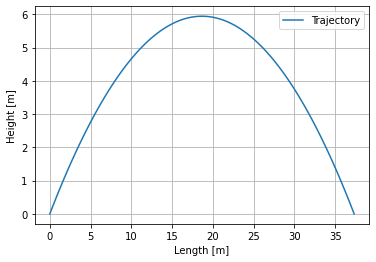

In [3]:
#Problem 3

#Im gonna use some of my functions from Problem2 to do this one

def eulerY3(T,theta):
    y = [0]
    v0y = [v0*np.sin(theta)] 
    dt = T[1]-T[0]
    
    for j in range(len(T)-1):
        y.append(y[-1] + dt*v0y[-1])
        v0y.append(v0y[-1] - dt*g)
        #print(y[j])
    return y, v0y

def y_num3(liste):
    T = np.linspace(0,liste[0],100)
    theta = liste[1]
    y, v0y = eulerY3(T,theta)
    return y[-1]

def ynum_new_constraint(liste):
    T = np.linspace(0,liste[0],100)
    theta = liste[1]
    y, v0y = eulerY3(T,theta)
    return 6-y[int(len(y)/2)]


def Problem3():
    #bounding and constraining as earlier
    bnds = [(0,None),(0,np.pi/2)]
    cnstr = [{"type": "eq", "fun": y_num3},{"type": "ineq", "fun": ynum_new_constraint}]
    
    #Optimizing the throw using minimize, and the numerical x
    res = optimize.minimize(x_num,[3,np.pi/7],method="SLSQP",bounds=bnds, constraints=cnstr)
    print(f"The maximized length of the throw is: {round(x_num(res.x)*(-1),3)} m\nand the angle of the throw is {round(res.x[1]*180/np.pi,2)}*.")
    
    
    #Setting x and y to plot using the optimized theta at different times
    optVec = res.x
    time = np.linspace(0,optVec[0],100)
    x = x_num([time,optVec[1]])*(-1)
    y_plot = y_num3([time,optVec[1]])
    


    #Plotting the ball trajectory
    plt.plot(x,y_plot, label="Trajectory")
    plt.xlabel("Length [m]")
    plt.ylabel("Height [m]")
    plt.grid()
    plt.legend()
    plt.show()
    
Problem3()